# LSI31003 Machine Learning in Molecular Biology Assignment 3

In [1]:
from setup import *
%matplotlib inline

In [2]:
#need to install some modules first so execute this cell
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scikit-learn

In [3]:
from scipy.stats import *

In [4]:
#Some extra packages that are useful in this assignment
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn import datasets
from scipy.stats import gaussian_kde

##  Introduction <a id='section1'></a>

In this assignment, we will explore data visualisation and density based clustering with t-SNE and K-Means . We use the same data set of somatic mutations as in assignments 1 and 2 from ["Alexandrov LB, et al. (2020) The repertoire of mutational signatures in human cancer. Nature"](https://www.nature.com/articles/s41586-020-1943-3).

In [5]:
## ploting 96 mutational channels
col_set = ['#0343df','#000000','#e50000','#929591','#3f9b0b','#ff81c0']
col_list = []
for i in range (len(col_set)):
    col_list += [col_set[i]] * 16

def plot_mutationchannels(sig, name=""):
    sns.set(rc={"figure.figsize":(11,2.5)})
    sns.set(style="whitegrid", color_codes=True)

    plt.bar(sig.index, sig, width = 0.5, color = col_list)
    plt.xticks(rotation=90, size = 7, weight='bold')
    plt.title (name, size = 12, weight='bold')
    plt.tight_layout()
    plt.show()

In [6]:
somaticMutations = pd.read_csv ("./data/MutSigCancer/WGS_PCAWG.96.csv")
somaticMutations = somaticMutations.set_index (somaticMutations['Mutation type'] + "_" + somaticMutations['Trinucleotide'])

In [91]:
SBS_sig = pd.read_csv ("./MutSigCancer/SBS_signatures.csv")

In [7]:
somaticMutations.shape

(96, 2782)

In [99]:
somaticMutations

Mutation type Trinucleotide  Biliary-AdenoCA::SP117655  \
C>A_ACA           C>A           ACA                        269   
C>A_ACC           C>A           ACC                        148   
C>A_ACG           C>A           ACG                         25   
C>A_ACT           C>A           ACT                        154   
C>A_CCA           C>A           CCA                        215   
...               ...           ...                        ...   
T>G_GTT           T>G           GTT                         89   
T>G_TTA           T>G           TTA                         83   
T>G_TTC           T>G           TTC                         48   
T>G_TTG           T>G           TTG                         63   
T>G_TTT           T>G           TTT                        197   

         Biliary-AdenoCA::SP117556  Biliary-AdenoCA::SP117627  \
C>A_ACA                        114                        105   
C>A_ACC                         56                         71   
C>A_ACG                         13                         13   
C>A_ACT                         70                         73   
C>A_CCA                         63                         71   
...                            ...                        ...   
T>G_GTT                         15                         14   
T>G_TTA                         26                         16   
T>G_TTC                         10                          8   
T>G_TTG                         31                         15   
T>G_TTT                         64                         52   

         Biliary-AdenoCA::SP117775  Biliary-AdenoCA::SP117332  \
C>A_ACA                        217                         52   
C>A_ACC                        123                         36   
C>A_ACG                         29                          8   
C>A_ACT                        126                         31   
C>A_CCA                        129                         30   
...                            ...                        ...   
T>G_GTT                         34                          7   
T>G_TTA                         38                         15   
T>G_TTC                         30                          8   
T>G_TTG                         53                         16   
T>G_TTT                        122                         38   

         Biliary-AdenoCA::SP117712  Biliary-AdenoCA::SP117017  \
C>A_ACA                        192                         54   
C>A_ACC                        139                         54   
C>A_ACG                         31                         12   
C>A_ACT                        119                         41   
C>A_CCA                        190                         54   
...                            ...                        ...   
T>G_GTT                         70                         17   
T>G_TTA                         49                         19   
T>G_TTC                         39                         15   
T>G_TTG                         56                         11   
T>G_TTT                        104                         47   

         Biliary-AdenoCA::SP117031  ...  Uterus-AdenoCA::SP94540  \
C>A_ACA                        196  ...                      117   
C>A_ACC                        102  ...                       90   
C>A_ACG                         15  ...                       12   
C>A_ACT                        122  ...                       82   
C>A_CCA                        133  ...                      119   
...                            ...  ...                      ...   
T>G_GTT                         46  ...                       21   
T>G_TTA                         47  ...                       34   
T>G_TTC                         28  ...                       21   
T>G_TTG                         45  ...                       20   
T>G_TTT                        127  ...                       90   

         Uterus-AdenoCA::SP95222  Uterus-AdenoCA::SP893

In [8]:
somaticMutations.head()

Mutation type Trinucleotide  Biliary-AdenoCA::SP117655  \
C>A_ACA           C>A           ACA                        269   
C>A_ACC           C>A           ACC                        148   
C>A_ACG           C>A           ACG                         25   
C>A_ACT           C>A           ACT                        154   
C>A_CCA           C>A           CCA                        215   

         Biliary-AdenoCA::SP117556  Biliary-AdenoCA::SP117627  \
C>A_ACA                        114                        105   
C>A_ACC                         56                         71   
C>A_ACG                         13                         13   
C>A_ACT                         70                         73   
C>A_CCA                         63                         71   

         Biliary-AdenoCA::SP117775  Biliary-AdenoCA::SP117332  \
C>A_ACA                        217                         52   
C>A_ACC                        123                         36   
C>A_ACG                         29                          8   
C>A_ACT                        126                         31   
C>A_CCA                        129                         30   

         Biliary-AdenoCA::SP117712  Biliary-AdenoCA::SP117017  \
C>A_ACA                        192                         54   
C>A_ACC                        139                         54   
C>A_ACG                         31                         12   
C>A_ACT                        119                         41   
C>A_CCA                        190                         54   

         Biliary-AdenoCA::SP117031  ...  Uterus-AdenoCA::SP94540  \
C>A_ACA                        196  ...                      117   
C>A_ACC                        102  ...                       90   
C>A_ACG                         15  ...                       12   
C>A_ACT                        122  ...                       82   
C>A_CCA                        133  ...                      119   

         Uterus-AdenoCA::SP95222  Uterus-AdenoCA::SP89389  \
C>A_ACA                      233                       94   
C>A_ACC                      167                       59   
C>A_ACG                       29                       14   
C>A_ACT                      213                       66   
C>A_CCA                      188                       67   

         Uterus-AdenoCA::SP90503  Uterus-AdenoCA::SP92460  \
C>A_ACA                      114                      257   
C>A_ACC                       64                      268   
C>A_ACG                       19                       51   
C>A_ACT                       68                      271   
C>A_CCA                       89                      307   

         Uterus-AdenoCA::SP92931  Uterus-AdenoCA::SP91265  \
C>A_ACA                      139                      404   
C>A_ACC                       75                      255   
C>A_ACG                       13                       52   
C>A_ACT                       68                      281   
C>A_CCA                       69                      339   

         Uterus-AdenoCA::SP89909  Uterus-AdenoCA::SP90629  \
C>A_ACA                       97                      250   
C>A_ACC                       78                      188   
C>A_ACG                       14                       49   
C>A_ACT                       80                      202   
C>A_CCA                      204                      194   

         Uterus-AdenoCA::SP95550  
C>A_ACA                      170  
C>A_ACC                      137  
C>A_ACG                       32  
C>A_ACT                      116  
C>A_CCA                      127  

[5 rows x 2782 columns]

### Problem 1: Visualisation of cancer mutations counts with PCA and t-SNE <a id='Problem1'></a>

#### Problem 1a: 
First, normalize the 96-dimensional vectors of somatic mutations such that each sample is a probability distribution over the 96 channels. Run then a two-component principal component analysis on those vectors and plot the samples on a plane of first and second principal component. Can you see any clusters? Print out the explained variance ratio. Hint: decomposition. PCA

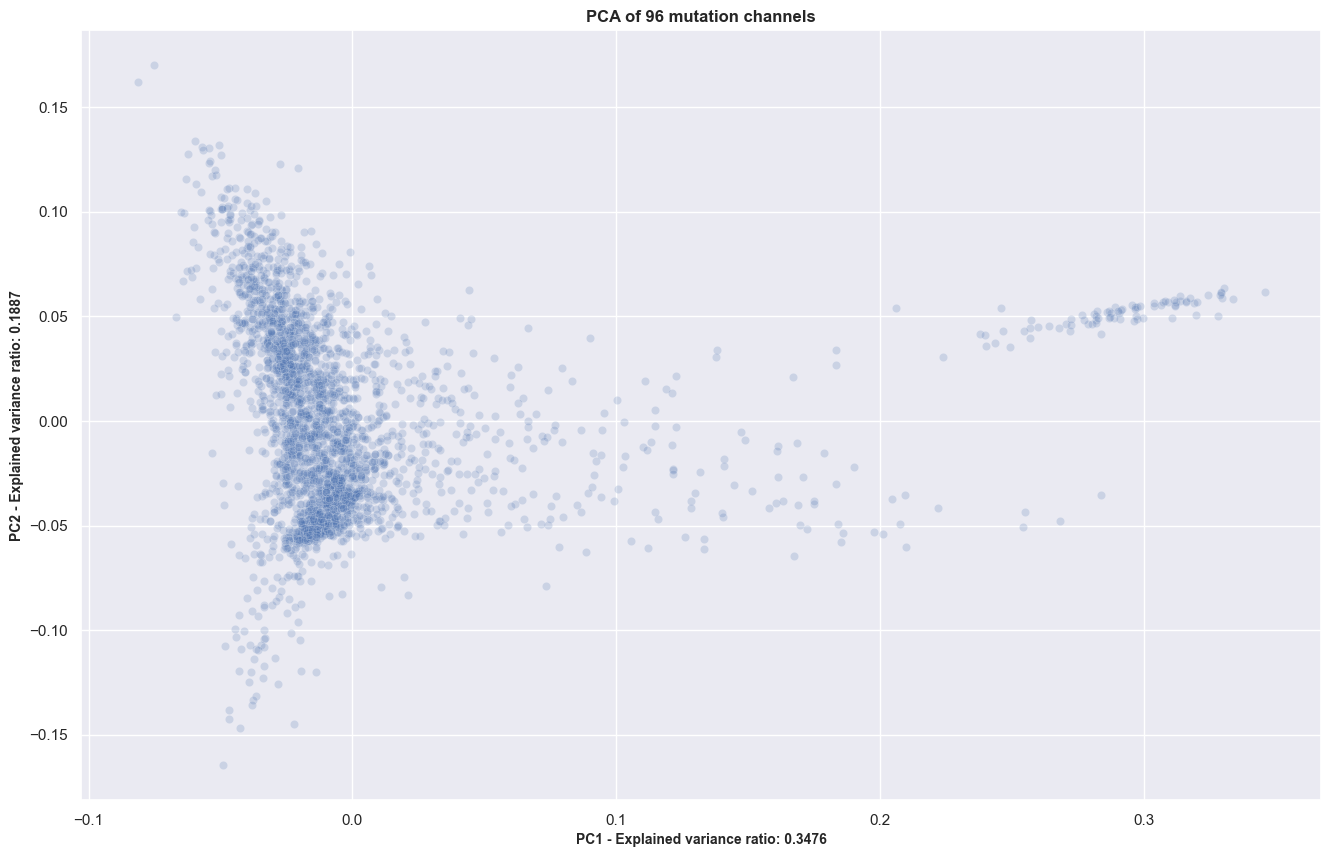

In [23]:
df = somaticMutations.iloc[:, 2:].T

# normalize the data row wise to be a propability distribution
df = df.div(df.sum(axis=1), axis=0)

pca_model = PCA(n_components=2)
pca_transformed = pca_model.fit_transform(df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_transformed, columns=("PC1", "PC2"))

# Plotting
_, ax = plt.subplots(figsize=(16, 10))
plt.title("PCA of 96 mutation channels", size=12, weight='bold')
sns.scatterplot(data=pca_df, x="PC1", y="PC2", alpha=0.2, ax=ax)


plt.xlabel(f"PC1 - Explained variance ratio: {pca_model.explained_variance_ratio_[0]:.4f}", size=10, weight='bold')
plt.ylabel(f"PC2 - Explained variance ratio: {pca_model.explained_variance_ratio_[1]:.4f}", size=10, weight='bold')
plt.show()


#### Problem 1b: 
Add colouring of samples by cancer type to the previous figure. That is, assign each cancer type a separate colour and plot the samples again on the plane of first two principal components. Do various cancer types show up uniformly in the map?

Hint : create a column `pca["cancer type"] = ...` and pass its name to *sns.scatterplot*'s hue parametre

In [27]:
pca_df["cancer type"] = somaticMutations.columns[2:].str.split("::").str[0]

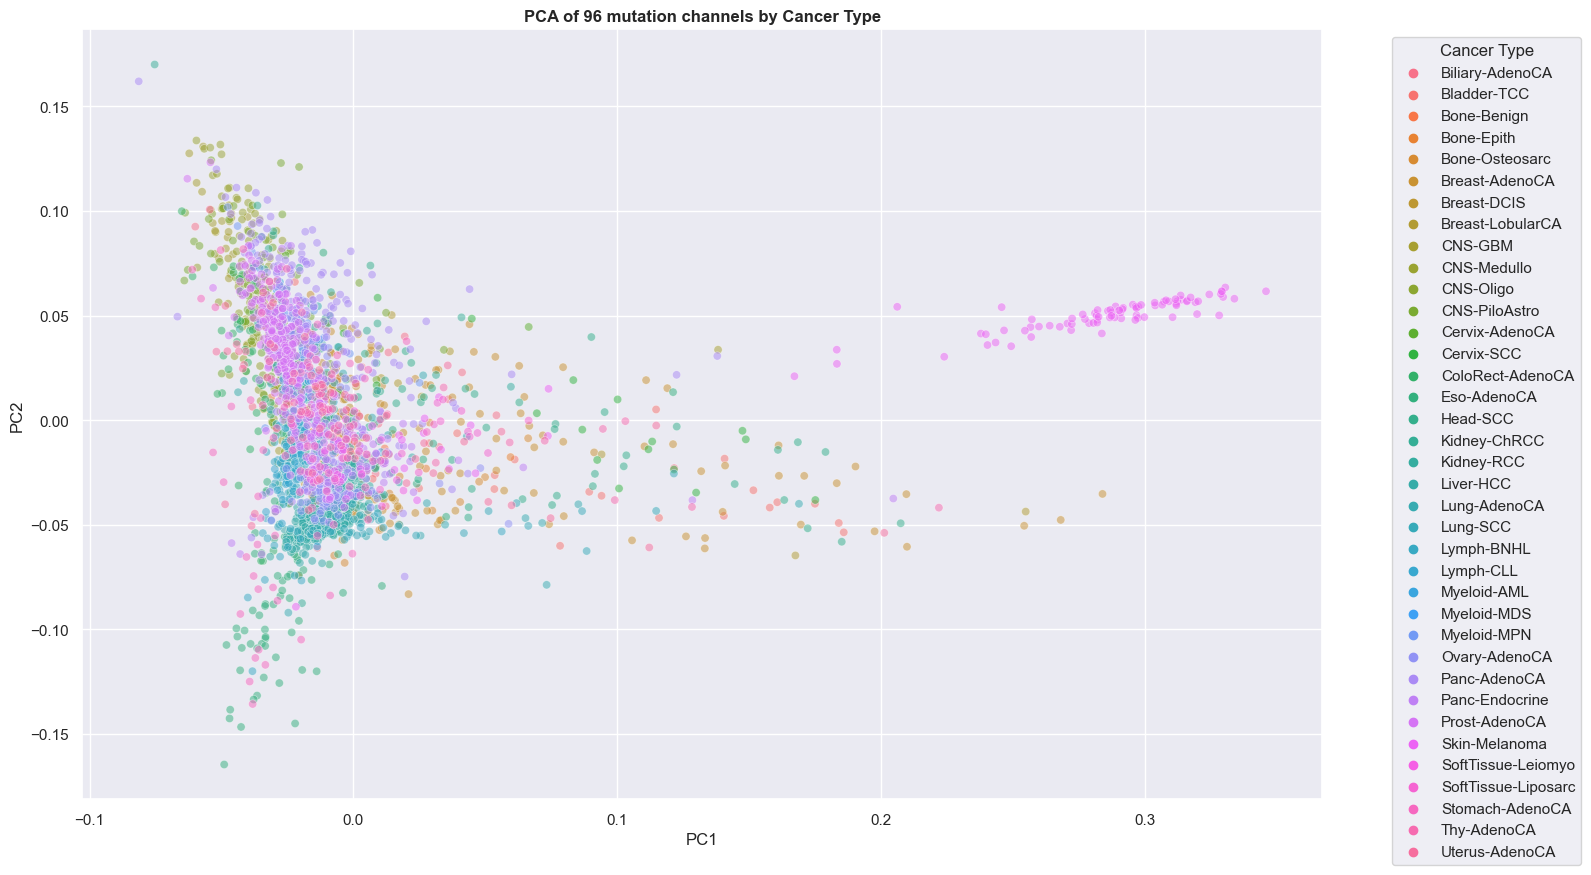

In [29]:
# plot the pca with the cancer type as sns hue
_, ax = plt.subplots(figsize=(16, 10))
plt.title("PCA of 96 mutation channels by Cancer Type", size=12, weight='bold')
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cancer type", alpha=0.5, ax=ax)
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

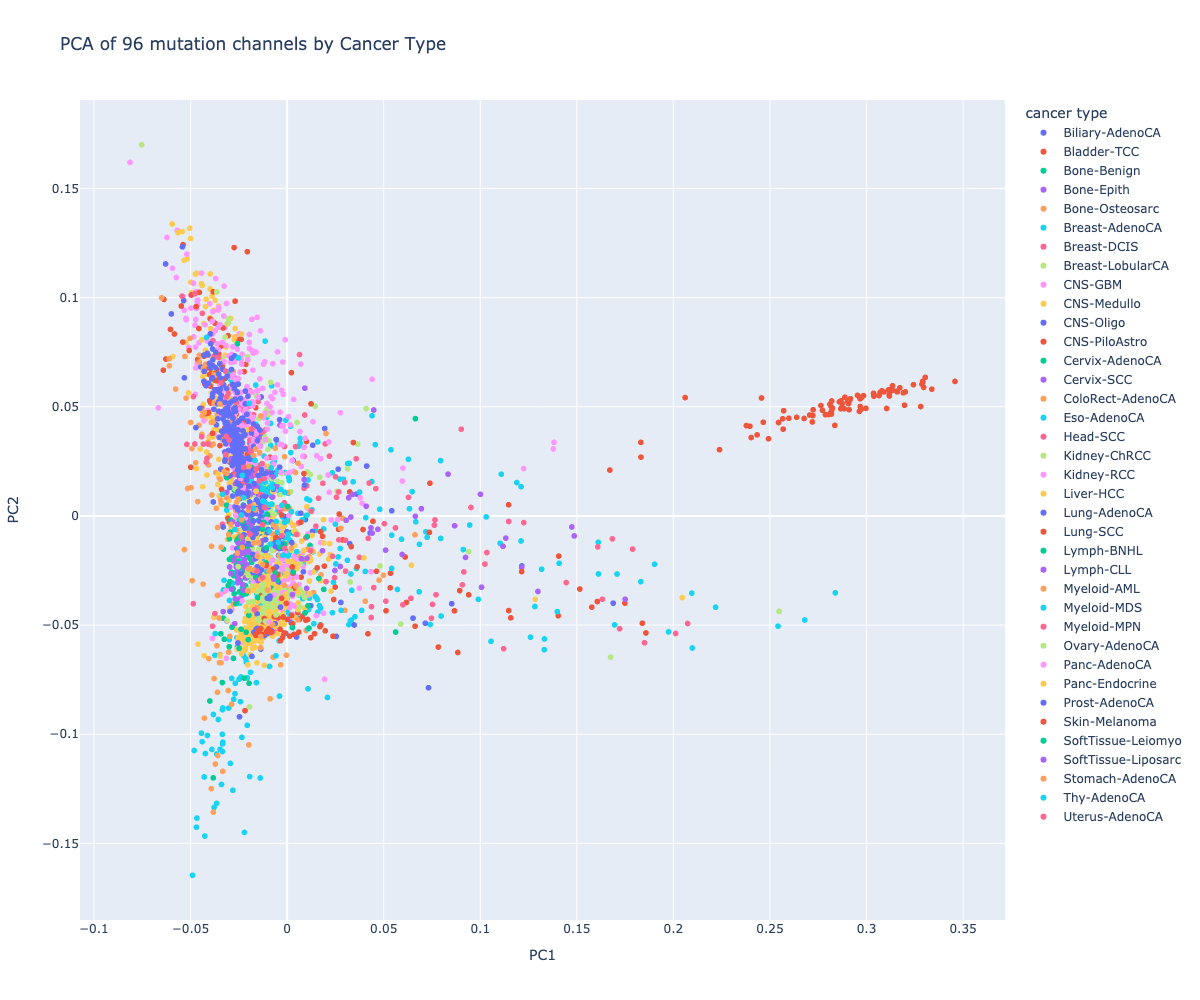

In [37]:
# make the plot using plotly interactive plot library
# 
import plotly.express as px

fig = px.scatter(pca_df, x="PC1", y="PC2", color="cancer type", title="PCA of 96 mutation channels by Cancer Type")
# make the plot bigger and more readable
fig.update_layout(width=1200, height=1000)

fig.show('png') # use png to show in browser as static image


#### Problem 1c: 
Run 2-component t-SNE with cosine metric on the 96-dimensional samples and plot the components again in 2 dimensions with the colouring by cancer type. You can use PCA as the initial state in the algorithm. Test a few values of perplexity, learning rate, and number of iterations until you find clear structure in the map, e.g. perplexity=30, n_iter=2500, learning_rate=500 is a starting point. Plot your best result. 

Hint: sklearn.manifold.TSNE . Note: The computation may take some time, even 10 minutes. 

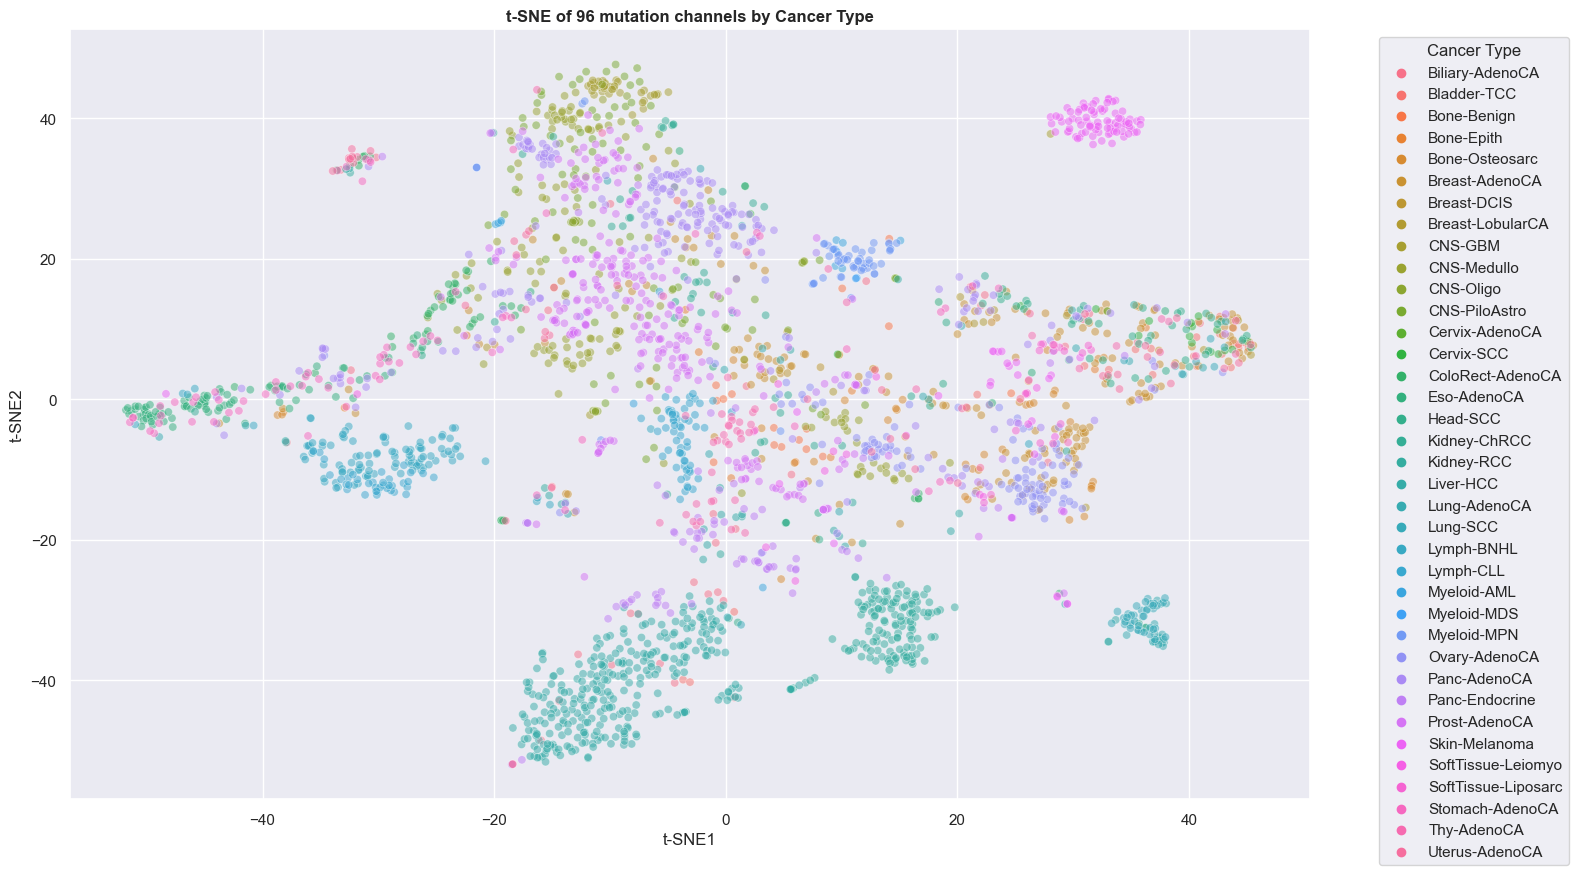

In [47]:
# two component t-SNE with cosine metric on the 96-dimensional space
tsne = pd.DataFrame(
    data    = TSNE(n_components = 2, metric = "cosine", init='pca').fit_transform(df),
    columns = ("t-SNE1", "t-SNE2")
)

tsne["Cancer Type"] = somaticMutations.columns[2:].str.split("::").str[0]

_, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(data = tsne, x = "t-SNE1", y = "t-SNE2", hue = "Cancer Type", alpha = 0.5, ax = ax)
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE of 96 mutation channels by Cancer Type", size=12, weight='bold')
plt.show()

In [42]:
# use also plotly to make the plot interactive
fig = px.scatter(tsne, x="t-SNE1", y="t-SNE2", color="Cancer Type", title="t-SNE of 96 mutation channels by Cancer Type")
fig.update_layout(width=1200, height=1000)
fig.show()
#fig.show('png') # use png to show in browser as static image this however makes it not interactive


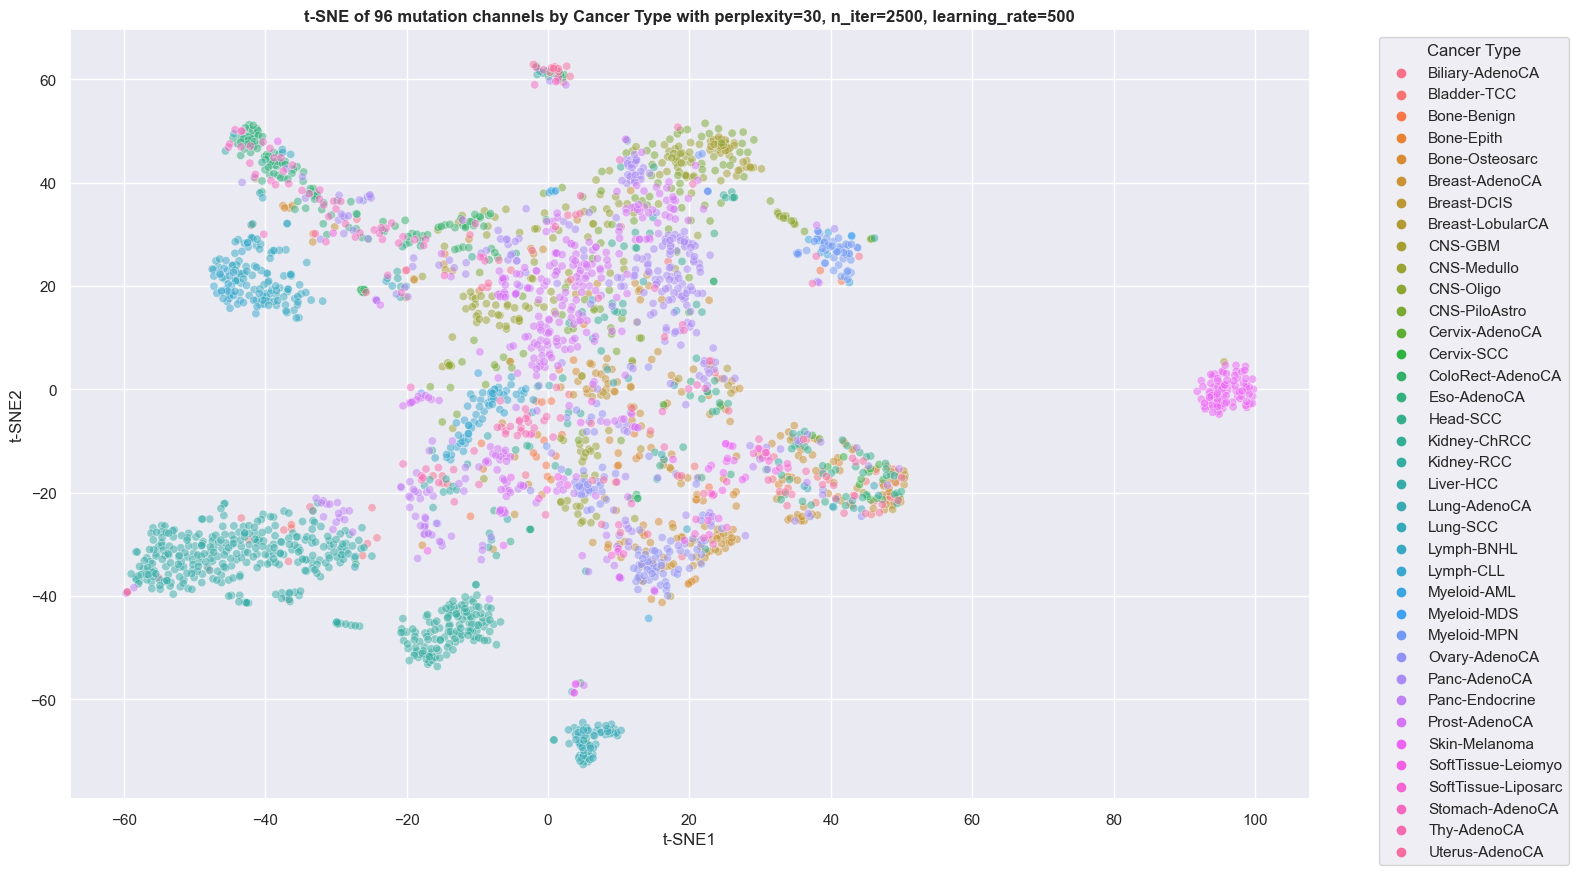

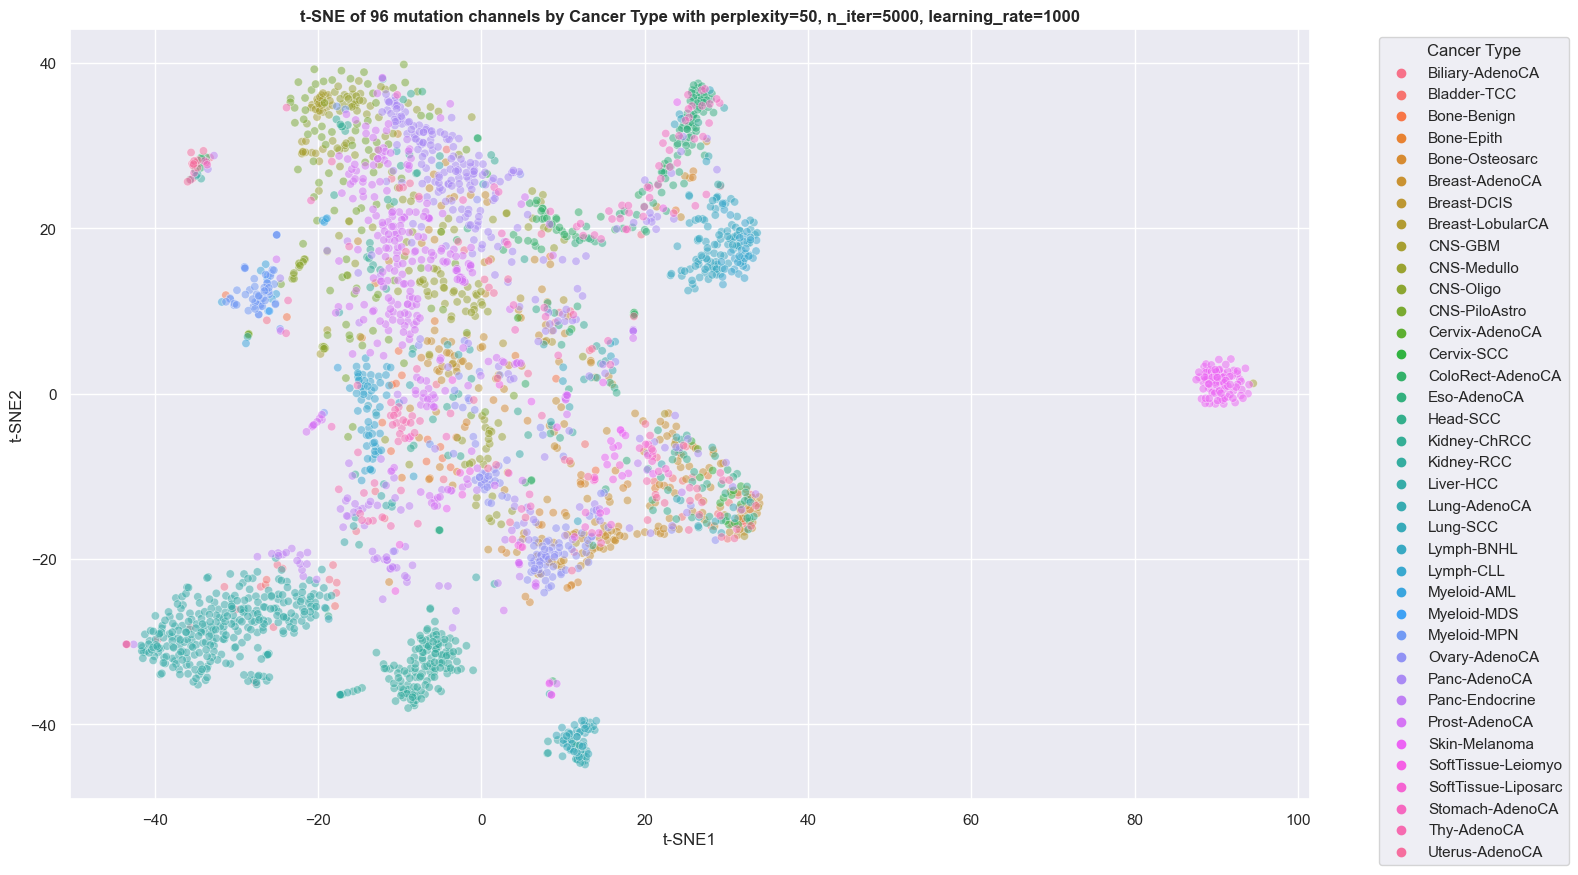

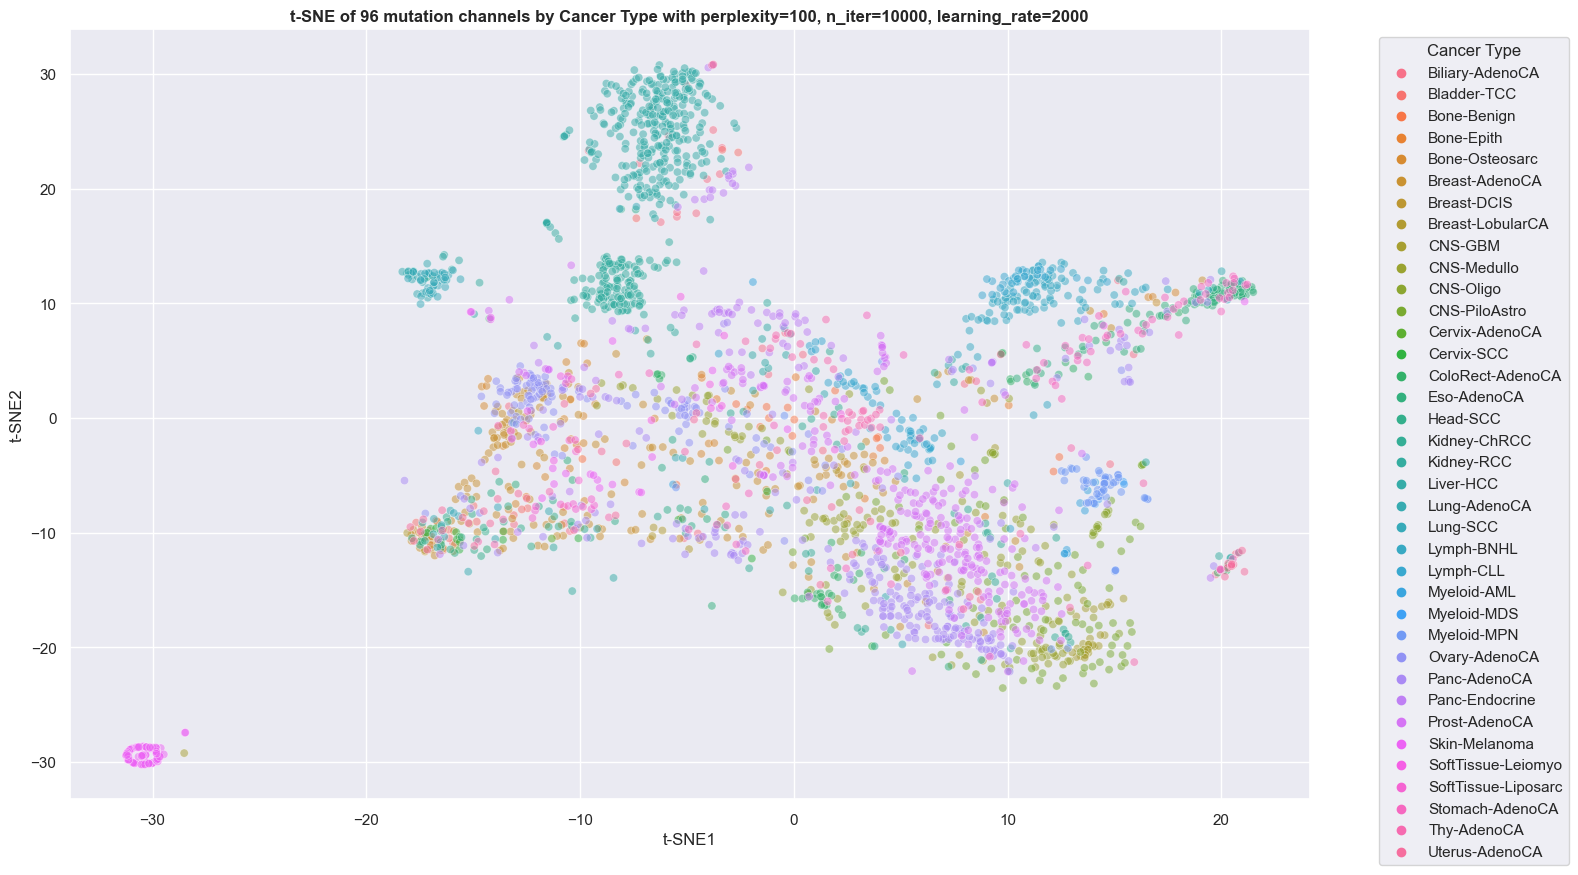

In [45]:
# loop to try different parameters for the t-SNE
#  perplexity=30, n_iter=2500, learning_rate=500 is a starting point. using 3 different values for each parameter

perplexities = [30, 50, 100]
n_iters = [2500, 5000, 10000]
learning_rates = [500, 1000, 2000]

# iterating over the different parameters
for i in range(len(n_iters)):
    p = perplexities[i]
    n = n_iters[i]
    l = learning_rates[i]
    tsne = pd.DataFrame(
        data    = TSNE(n_components = 2, perplexity = p, n_iter = n, learning_rate = l, metric = "cosine", init='pca').fit_transform(df),
        columns = ("t-SNE1", "t-SNE2")
    )

    tsne["Cancer Type"] = somaticMutations.columns[2:].str.split("::").str[0]

    _, ax = plt.subplots(figsize = (16, 10))
    sns.scatterplot(data = tsne, x = "t-SNE1", y = "t-SNE2", hue = "Cancer Type", alpha = 0.5, ax = ax)
    plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"t-SNE of 96 mutation channels by Cancer Type with perplexity={p}, n_iter={n}, learning_rate={l}", size=12, weight='bold')
    plt.show()




### Problem 2: Density based clustering <a id='Problem2'></a>

#### Problem 2 a: 
Plot the components of t-SNE again but with a colour coding given by the density heat map of the points (e.g. red for high and blue for low density). Plot in another figure just the points that belong to high-density areas. You can pick the threshold for 'high density' yourself such that you get clear clusters. 

Hint: 

xy = np.vstack([tsne_results[:, 0], tsne_results[:, 1]])

z = gaussian_kde(xy, 0.05)(xy)

z=z/np.max(z) 

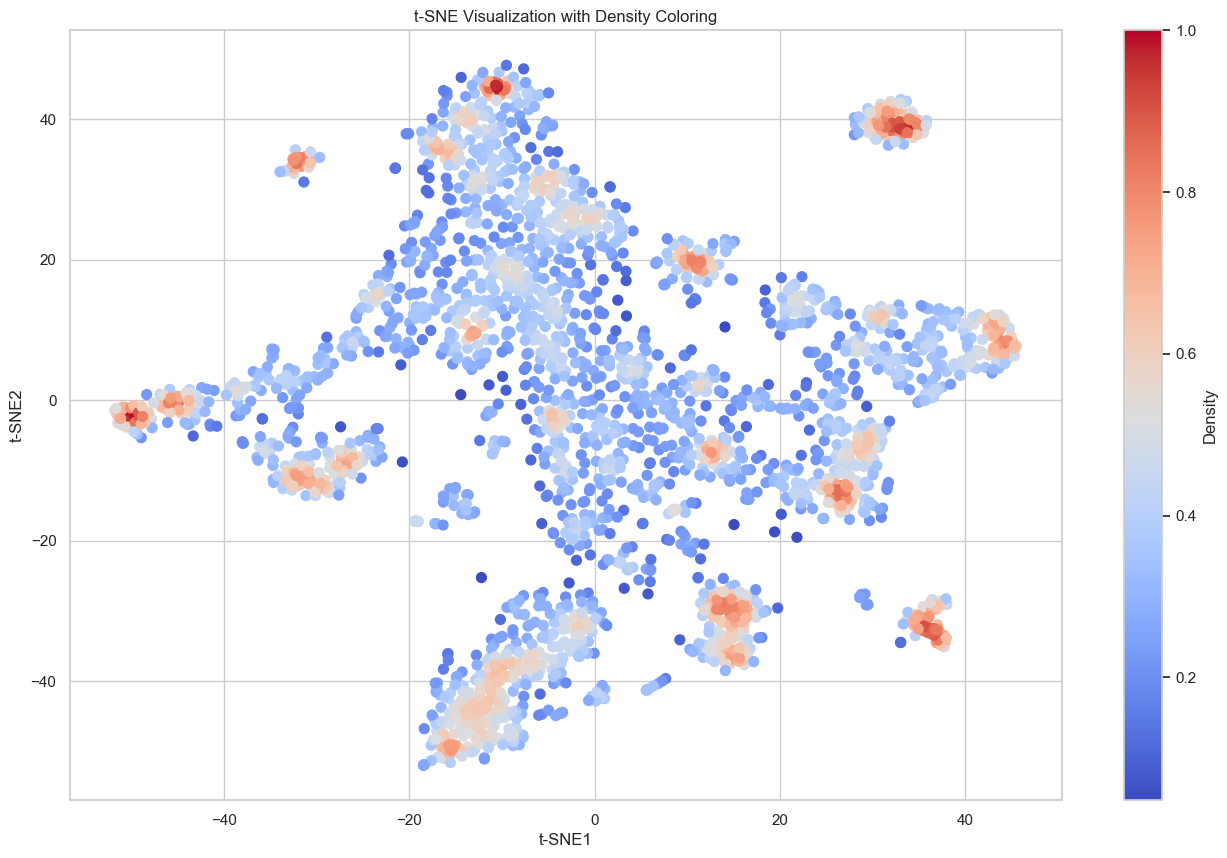

In [87]:
tsne = pd.DataFrame(
    data    = TSNE(n_components = 2, metric = "cosine", init='pca').fit_transform(df),
    columns = ("t-SNE1", "t-SNE2")
)


xy = np.vstack([tsne.iloc[:, 0], tsne.iloc[:, 1]])

z = gaussian_kde(xy, 0.05)(xy)

z=z/np.max(z)

fig, ax = plt.subplots(figsize=(16, 10))
scatter = ax.scatter(tsne['t-SNE1'].values, tsne['t-SNE2'].values, c=z, s=50, cmap=plt.cm.coolwarm)
plt.colorbar(scatter, ax=ax, label='Density')
plt.title('t-SNE Visualization with Density Coloring')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

<Axes: xlabel='t-SNE1', ylabel='t-SNE2'>

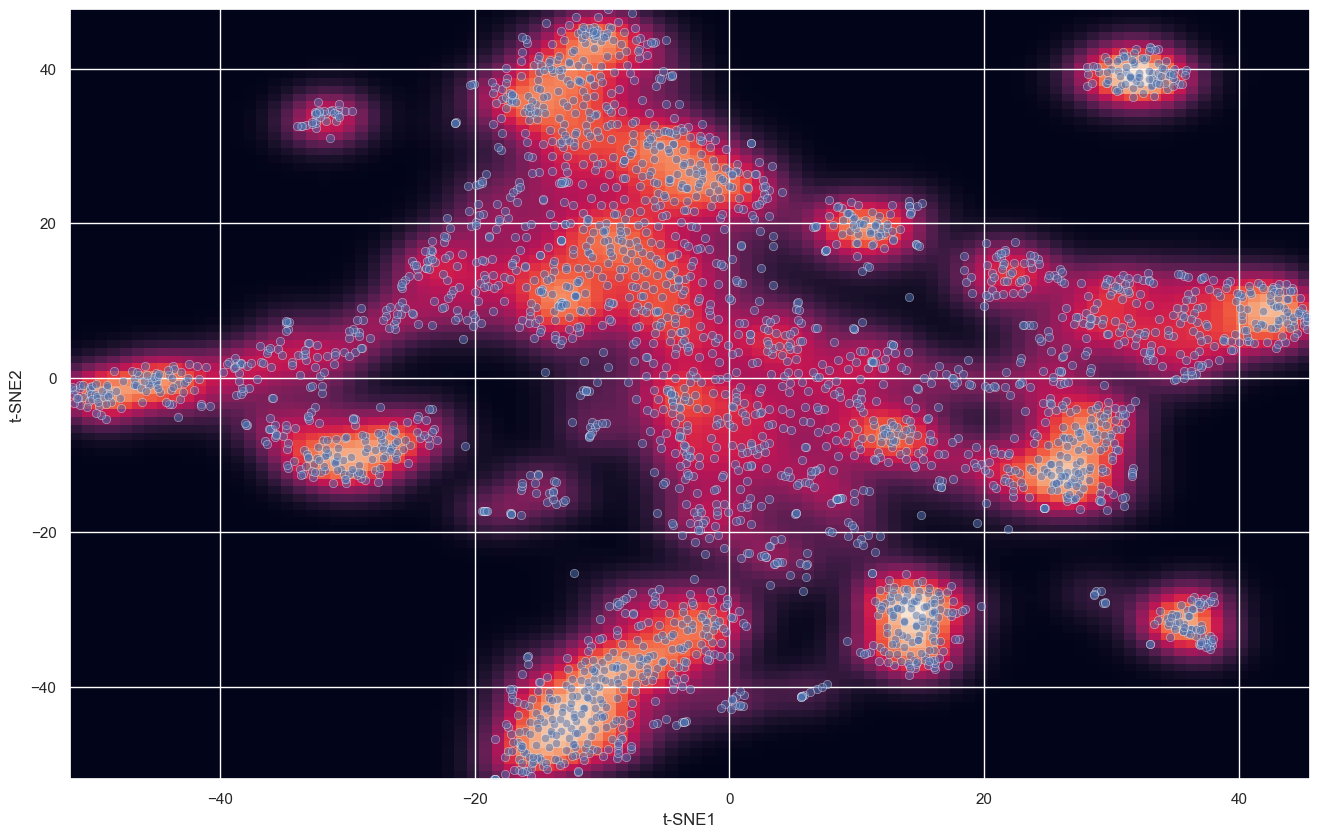

In [52]:
x = np.linspace(tsne["t-SNE1"].min(), tsne["t-SNE1"].max(), 100)
y = np.linspace(tsne["t-SNE2"].min(), tsne["t-SNE2"].max(), 100)
x, y = np.meshgrid(x, y)
xy = np.column_stack([x.flat, y.flat])

# Create a kernel density estimate
kde = gaussian_kde(tsne[["t-SNE1", "t-SNE2"]].T, bw_method=0.1)
z = kde(xy.T).reshape(x.shape)

# Plot the density estimate
_, ax = plt.subplots(figsize = (16, 10))
ax.imshow(z, origin = "lower", aspect = "auto", extent = [x.min(), x.max(), y.min(), y.max()])
sns.scatterplot(data = tsne, x = "t-SNE1", y = "t-SNE2", alpha = 0.5, ax = ax)

# plot for the high density points


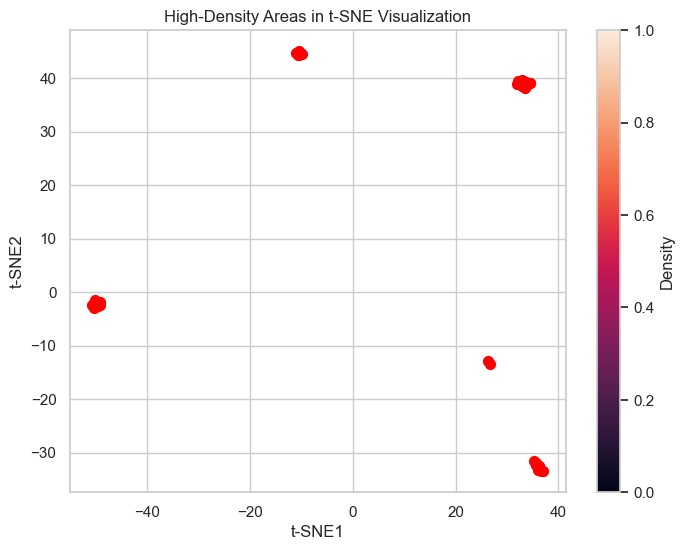

In [104]:
# plotting only the top 10% of the density
high_density_indices = z > 0.87 # Adjust threshold as needed

high_density_tsne = tsne.iloc[high_density_indices, :]
high_density_z = z[high_density_indices]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(high_density_tsne['t-SNE1'], high_density_tsne['t-SNE2'], s=50, color ='red')
plt.colorbar(scatter, label='Density')
plt.title('High-Density Areas in t-SNE Visualization')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()



#### Problem 2 b: 
Run K-means on the high density data and plot the mean profile over the 96 channels in each of these clusters. Do you see any of the signatures listed in http://cancer.sanger.ac.uk/cosmic/signatures ?

I am not quite sure what I should be doing in this problem. What it means to plot the mean profile ?  I will try to implement the solution as best as I can.

In [126]:
original_data = somaticMutations.iloc[:,2:].T

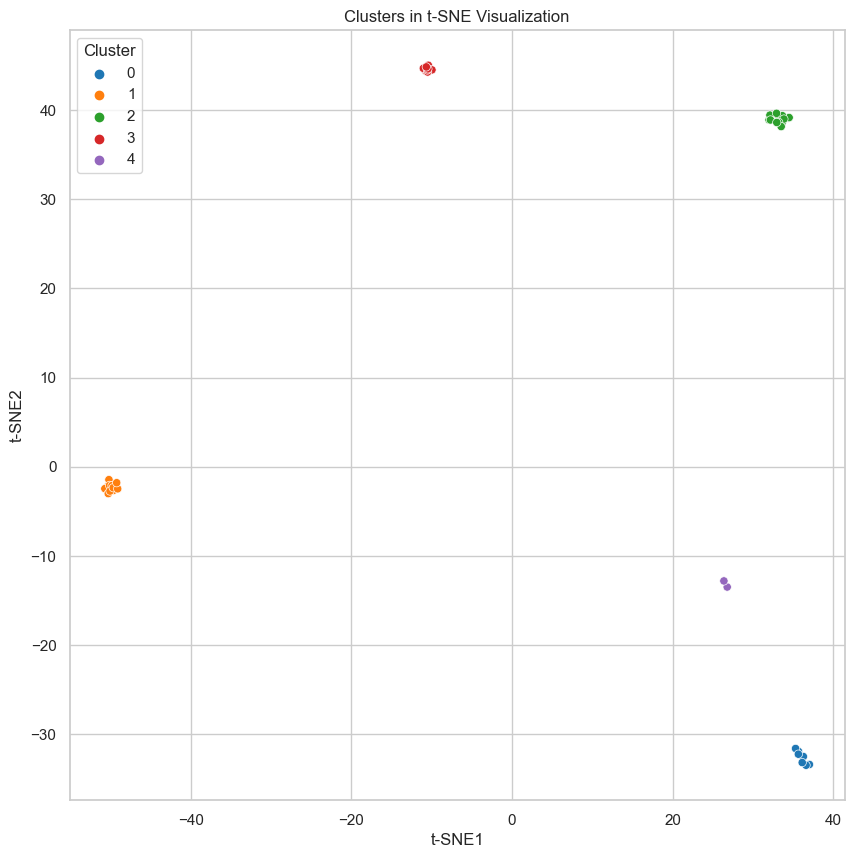

In [127]:
# Initialize an empty array to store mean profiles
# run k-means with 4 clusters

high_density_indices  = z > 0.87
high_density_data = tsne.iloc[high_density_indices]

kmeans = KMeans(n_clusters=5, random_state=0).fit(high_density_data.iloc[:, :2])
high_density_data["Cluster"] = kmeans.labels_

# Plot the clusters
_, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = high_density_data, x = "t-SNE1", y = "t-SNE2", hue = "Cluster", palette = "tab10", ax = ax)
plt.title("Clusters in t-SNE Visualization")
plt.show()


In [128]:
# change the index, create first the sample name column 
original_data = original_data.reset_index(drop=False)

# rename the index column to "Sample"
original_data.rename(columns = {"index": "Sample"}, inplace = True)

In [130]:
original_data.loc[high_density_data.index, 'Cluster'] = high_density_data['Cluster']

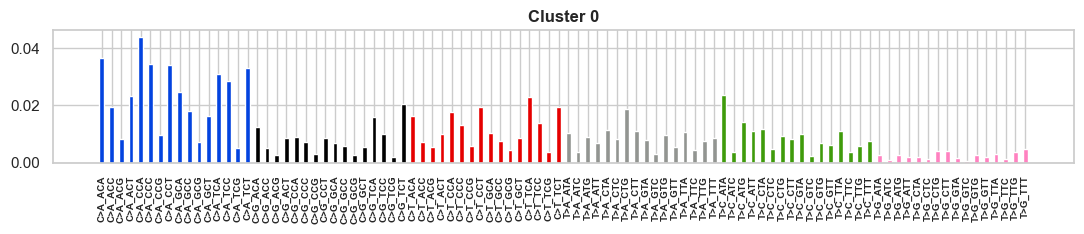

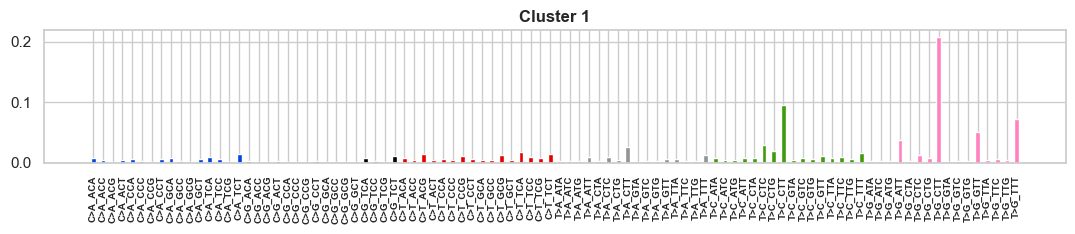

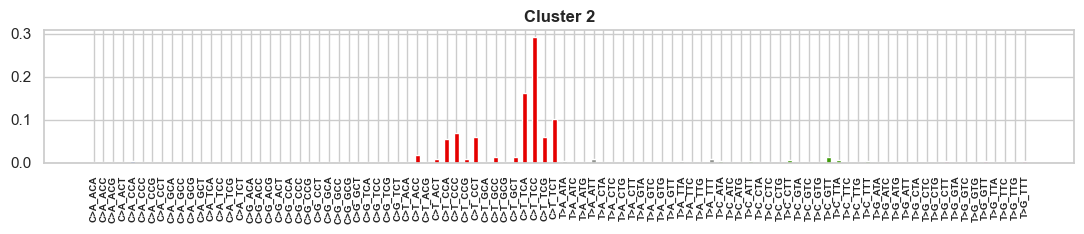

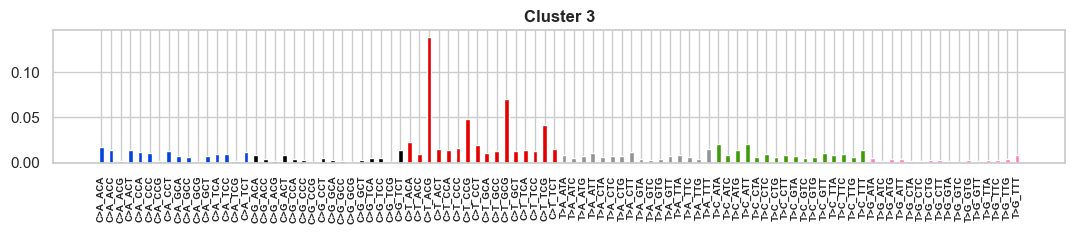

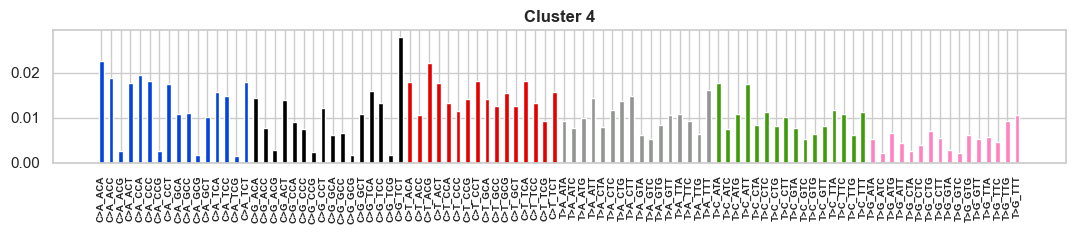

In [140]:
# remove the nan values from the original data
original_data.dropna(subset=['Cluster'], inplace=True)

# Plot the mutational channels for each cluster
for i in range(5):
    cluster_data = original_data[original_data["Cluster"] == i].iloc[:, 1:-1]
    cluster_data = cluster_data.mean(axis = 0)
    # normalize the data row wise to be a propability distribution
    cluster_data = cluster_data.div(cluster_data.sum(axis=0), axis=0)
    
    plot_mutationchannels(cluster_data, f"Cluster {i}")
    plt.show()




Do I need to compare these plots to the plots in the link provided ? <br> 

Cluster 0: looks a bit like SBS3 <br>
Cluster 1: looks a bit like SBS28 <br>
Cluster 2: looks a bit like SBS9 <br>
Cluster 3: looks a bit like SBS42 <br>
Cluster 4: looks a bit like SBS3 or SBS40b<br>